mounting the google drive to give the data path

In [2775]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


importing the requrired librarries


In [2776]:
#importing the libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

Loading the dataset


In [2777]:
# Read csv file using pandas
data_load=pd.read_csv("/content/drive/MyDrive/Jio_Health/PCOS_data.csv",delimiter=',')
data_load.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,1,0,28,44.6,152.0,19.3,15,78,22,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,2,0,36,65.0,161.5,24.9,15,74,20,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,3,1,33,68.8,165.0,25.3,11,72,18,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,4,0,37,65.0,148.0,29.7,13,72,20,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,5,0,25,52.0,161.0,20.1,11,72,18,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


In [2778]:
#features 
for colum in data_load.columns:
  print(colum)

Sl. No
Patient File No.
PCOS (Y/N)
 Age (yrs)
Weight (Kg)
Height(Cm) 
BMI
Blood Group
Pulse rate(bpm) 
RR (breaths/min)
Hb(g/dl)
Cycle(R/I)
Cycle length(days)
Marraige Status (Yrs)
Pregnant(Y/N)
No. of abortions
  I   beta-HCG(mIU/mL)
II    beta-HCG(mIU/mL)
FSH(mIU/mL)
LH(mIU/mL)
FSH/LH
Hip(inch)
Waist(inch)
Waist:Hip Ratio
TSH (mIU/L)
AMH(ng/mL)
PRL(ng/mL)
Vit D3 (ng/mL)
PRG(ng/mL)
RBS(mg/dl)
Weight gain(Y/N)
hair growth(Y/N)
Skin darkening (Y/N)
Hair loss(Y/N)
Pimples(Y/N)
Fast food (Y/N)
Reg.Exercise(Y/N)
BP _Systolic (mmHg)
BP _Diastolic (mmHg)
Follicle No. (L)
Follicle No. (R)
Avg. F size (L) (mm)
Avg. F size (R) (mm)
Endometrium (mm)


Exploratery data analysis and preprocessing

In [2779]:
#check shape of the dataset
data_load.shape

(541, 44)

In [2780]:
#description of the data set
data_load.describe()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,541.000000,540.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,271.000000,271.000000,0.327172,31.430684,59.637153,156.484835,24.307579,13.802218,73.247689,19.243993,...,0.489834,0.514815,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,156.317519,156.317519,0.469615,5.411006,11.028287,6.033545,4.055129,1.840812,4.430285,1.688629,...,0.500359,0.500244,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,1.000000,1.000000,0.000000,20.000000,31.000000,137.000000,12.400000,11.000000,13.000000,16.000000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,136.000000,136.000000,0.000000,28.000000,52.000000,152.000000,21.600000,13.000000,72.000000,18.000000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,271.000000,271.000000,0.000000,31.000000,59.000000,156.000000,24.200000,14.000000,72.000000,18.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,406.000000,406.000000,1.000000,35.000000,65.000000,160.000000,26.600000,15.000000,74.000000,20.000000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,541.000000,541.000000,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


In [2781]:
#droping the irrelevent columns
dummy=data_load.iloc[:,0:2]
dummy.shape

(541, 2)

In [2782]:
#data=data.drop(['Sl. No','Patient File No.'], axis=1)
data=data_load.drop(dummy, axis=1)
data.shape

(541, 42)

In [2783]:
data.describe()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,541.000000,540.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,0.327172,31.430684,59.637153,156.484835,24.307579,13.802218,73.247689,19.243993,11.160037,2.560074,...,0.489834,0.514815,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,0.469615,5.411006,11.028287,6.033545,4.055129,1.840812,4.430285,1.688629,0.866904,0.901950,...,0.500359,0.500244,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,0.000000,20.000000,31.000000,137.000000,12.400000,11.000000,13.000000,16.000000,8.500000,2.000000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,28.000000,52.000000,152.000000,21.600000,13.000000,72.000000,18.000000,10.500000,2.000000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,0.000000,31.000000,59.000000,156.000000,24.200000,14.000000,72.000000,18.000000,11.000000,2.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,1.000000,35.000000,65.000000,160.000000,26.600000,15.000000,74.000000,20.000000,11.700000,4.000000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,14.800000,5.000000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


data contains the object so removing or replacing the specific row:

In [2784]:
#removing the unwanted data points
# data['AMH(ng/mL)'] = data['AMH(ng/mL)'].astype(float)
index = data[data['AMH(ng/mL)'] == 'a'].index
# index = df[df['Character Name'] == 'Spellman'].index
data.drop(index, inplace=True)
#df['object_column'] = df['int_column'].astype(str).astype(int)

In [2785]:
data['II    beta-HCG(mIU/mL)'] = data['II    beta-HCG(mIU/mL)'].replace('1.99.', '1.99')
data['II    beta-HCG(mIU/mL)']=data['II    beta-HCG(mIU/mL)'].astype(float)

# df[column_name].replace([old_value1, old_value2, old_value3], new_value)
#index

In [2786]:
data.dtypes

PCOS (Y/N)                  int64
 Age (yrs)                  int64
Weight (Kg)               float64
Height(Cm)                float64
BMI                       float64
Blood Group                 int64
Pulse rate(bpm)             int64
RR (breaths/min)            int64
Hb(g/dl)                  float64
Cycle(R/I)                  int64
Cycle length(days)          int64
Marraige Status (Yrs)     float64
Pregnant(Y/N)               int64
No. of abortions            int64
  I   beta-HCG(mIU/mL)    float64
II    beta-HCG(mIU/mL)    float64
FSH(mIU/mL)               float64
LH(mIU/mL)                float64
FSH/LH                    float64
Hip(inch)                   int64
Waist(inch)                 int64
Waist:Hip Ratio           float64
TSH (mIU/L)               float64
AMH(ng/mL)                 object
PRL(ng/mL)                float64
Vit D3 (ng/mL)            float64
PRG(ng/mL)                float64
RBS(mg/dl)                float64
Weight gain(Y/N)            int64
hair growth(Y/

In [2787]:
data['AMH(ng/mL)'] = data['AMH(ng/mL)'].astype(float)

In [2788]:
#information of the data set
data.info

<bound method DataFrame.info of      PCOS (Y/N)   Age (yrs)  Weight (Kg)  Height(Cm)    BMI  Blood Group  \
0             0          28         44.6      152.000  19.3           15   
1             0          36         65.0      161.500  24.9           15   
2             1          33         68.8      165.000  25.3           11   
3             0          37         65.0      148.000  29.7           13   
4             0          25         52.0      161.000  20.1           11   
..          ...         ...          ...          ...   ...          ...   
536           0          35         50.0      164.592  18.5           17   
537           0          30         63.2      158.000  25.3           15   
538           0          36         54.0      152.000  23.4           13   
539           0          27         50.0      150.000  22.2           15   
540           1          23         82.0      165.000  30.1           13   

     Pulse rate(bpm)   RR (breaths/min)  Hb(g/dl)  Cycl

In [2789]:
data.isnull().sum()

PCOS (Y/N)                0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     1
Pregnant(Y/N)             0
No. of abortions          0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)           1
Reg.Exercise(Y/N)         0
BP _Systolic (mmHg) 

In [2790]:
#droping the null values
data=data.dropna()

In [2791]:
#pearson correlation coefficient between -1 and 1
#-1 means negatively highly correlated and 1 is positively highly correalted and 0 means uncorrelate 
#so near to 0 correlation value will be most acceptable
data.corr()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
PCOS (Y/N),1.000000,-0.171349,0.209969,0.065465,0.198854,0.033701,0.092699,0.038641,0.087809,0.401837,...,0.290335,0.380985,0.071979,0.007923,0.033562,0.601208,0.650929,1.299969e-01,0.094528,0.107639
Age (yrs),-0.171349,1.000000,-0.030984,-0.119885,0.020051,-0.011836,0.045634,0.088748,-0.023686,-0.085473,...,-0.034990,-0.034234,-0.025916,0.072437,0.066779,-0.113809,-0.158386,-2.096918e-02,-0.082677,-0.100115
Weight (Kg),0.209969,-0.030984,1.000000,0.419808,0.901806,0.071354,0.020101,0.045339,0.009363,0.201575,...,0.064817,0.162872,-0.065109,0.028122,0.129210,0.171896,0.124669,-2.351731e-02,-0.075220,-0.009452
Height(Cm),0.065465,-0.119885,0.419808,1.000000,-0.006880,0.039409,-0.073608,-0.030492,0.025962,-0.021780,...,0.064912,0.032853,0.015610,-0.068720,0.009094,0.102968,0.075560,-2.741536e-02,0.058357,-0.056273
BMI,0.198854,0.020051,0.901806,-0.006880,1.000000,0.060550,0.050266,0.063902,0.002888,0.235623,...,0.044740,0.159935,-0.078480,0.070650,0.138603,0.142626,0.104735,-1.370214e-02,-0.113061,0.010980
Blood Group,0.033701,-0.011836,0.071354,0.039409,0.060550,1.000000,0.047865,-0.022707,-0.001652,0.123310,...,0.040382,-0.034770,0.067994,0.031264,0.051543,0.058719,0.014200,-3.759934e-02,-0.017517,-0.015257
Pulse rate(bpm),0.092699,0.045634,0.020101,-0.073608,0.050266,0.047865,1.000000,0.305676,-0.052796,0.103416,...,-0.004395,0.059712,-0.039055,-0.025021,0.007676,0.041534,0.049168,-4.867105e-02,-0.034141,-0.040456
RR (breaths/min),0.038641,0.088748,0.045339,-0.030492,0.063902,-0.022707,0.305676,1.000000,-0.038693,0.012769,...,0.032356,0.137533,-0.054183,0.013981,0.057322,0.069848,0.012856,-2.919643e-02,-0.020780,-0.066551
Hb(g/dl),0.087809,-0.023686,0.009363,0.025962,0.002888,-0.001652,-0.052796,-0.038693,1.000000,0.040443,...,0.051089,0.077310,0.011980,0.053583,0.000475,0.062314,0.073459,3.087933e-02,0.023528,-0.063592
Cycle(R/I),0.401837,-0.085473,0.201575,-0.021780,0.235623,0.123310,0.103416,0.012769,0.040443,1.000000,...,0.129362,0.208929,-0.006537,0.051787,0.082659,0.293743,0.253369,3.437944e-02,0.015318,0.039612


In [2792]:
#visualization of correlation matrix 
import seaborn as sns
# matrix = data.corr()
# plt.figure(figsize=(100,100))
# sns.heatmap(matrix, annot=True)
# plt.show()

In [2793]:
data

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0,28,44.6,152.000,19.3,15,78,22,10.48,2,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,0,36,65.0,161.500,24.9,15,74,20,11.70,2,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,1,33,68.8,165.000,25.3,11,72,18,11.80,2,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,0,37,65.0,148.000,29.7,13,72,20,12.00,2,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,0,25,52.0,161.000,20.1,11,72,18,10.00,2,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,0,35,50.0,164.592,18.5,17,72,16,11.00,2,...,0,0.0,0,110,70,1,0,17.5,10.0,6.7
537,0,30,63.2,158.000,25.3,15,72,18,10.80,2,...,0,0.0,0,110,70,9,7,19.0,18.0,8.2
538,0,36,54.0,152.000,23.4,13,74,20,10.80,2,...,0,0.0,0,110,80,1,0,18.0,9.0,7.3
539,0,27,50.0,150.000,22.2,15,74,20,12.00,4,...,1,0.0,0,110,70,7,6,18.0,16.0,11.5


In [2794]:
#creating new derivating features, insight understanding of the features 
#as BMI gives the good isights so creating the buckets of BMI
#BELOW 18 underwait, 18-26 helthy and above 26 overweight
#data['BMI_catg']=data.apply(lambda x: if x<18 return 1,if x>=18 and x<26 return 2, else return 3)


def BMI_Insights(x):
  if x<18:
    return 'A'
  elif x>=18 and x<26:
    return 'B'
  else:
    return 'C'
data['BMI_catg']=data['BMI'].map(BMI_Insights)

#creating the bucket for hypertension and non hypertension

def Systole(p1):
  if p1<110:
    return 'hypo'
  elif p1>=110 and p1<130:
    return 'normal'
  elif p1>=130  and p1<140:
    return 'pre_hyper'
  else:
    return 'hyper'

data['Systolic_cond']=data['BP _Systolic (mmHg)'].map(Systole)



def Diastole(p2):
  if p2<60:
    return 'hypo'
  elif p2>=60 and p2<85:
    return 'normal'
  elif p2>=85  and p2<90:
    return 'pre_hyper'
  else:
    return 'hyper'

data['Diastolic_cond']=data['BP _Diastolic (mmHg)'].map(Diastole)
 
#https://www.invitra.com/en/female-hormone-check/#:~:text=Normal%20hormone%20levels%20in%20women%20Progesterone%20%28P4%29%20Normal,they%20shouold%20be%20lower%20than%201.5%20ng%2Fml.%20Prolactin

def lh(z):
  if z<2:
    return 'abn1'
  elif z>10:
    return 'abn2'
  else:
    return 'nrml'

data['LH_cond']=data['LH(mIU/mL)'].map(lh)

#


In [2795]:
# data=data.drop('BMI', axis=1)
data['BMI_catg'].value_counts()

B    334
C    176
A     28
Name: BMI_catg, dtype: int64

In [2796]:
data['Diastolic_cond'].value_counts()

normal    536
hypo        1
hyper       1
Name: Diastolic_cond, dtype: int64

In [2797]:
data['Systolic_cond'].value_counts()

normal       514
hypo          14
pre_hyper      8
hyper          2
Name: Systolic_cond, dtype: int64

In [2798]:
data['LH_cond'].value_counts()

nrml    298
abn1    233
abn2      7
Name: LH_cond, dtype: int64

In [2799]:
#one hot encoding implementation to categories the perticular feature and gives to the model 

from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on specif peature or multiple features 
encoder_df = pd.DataFrame(encoder.fit_transform(data[['BMI_catg','Systolic_cond','LH_cond']]).toarray())

#encoder_df1 = pd.DataFrame(encoder.fit_transform(data[['BMI_catg']]).toarray())

#encoder_df2 = pd.DataFrame(encoder.fit_transform(data[['Systolic_cond']]).toarray())

#encoder_df3 = pd.DataFrame(encoder.fit_transform(data[['Diastolic_cond']]).toarray())
#encoder_df4 = pd.DataFrame(encoder.fit_transform(data[['LH_cond']]).toarray())
#merge one-hot encoded columns back with original DataFrame
final_df = pd.merge(data, encoder_df, left_index=True, right_index=True)
# encoded_data = pd.get_dummies(data, columns = ['BMI_a', 'BMI_b','BMI_c'])
final_df

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,0,1,2,3,4,5,6,7,8,9
0,0,28,44.6,152.000,19.3,15,78,22,10.48,2,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0,36,65.0,161.500,24.9,15,74,20,11.70,2,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1,33,68.8,165.000,25.3,11,72,18,11.80,2,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0,37,65.0,148.000,29.7,13,72,20,12.00,2,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0,25,52.0,161.000,20.1,11,72,18,10.00,2,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,1,26,53.5,161.544,20.5,14,70,18,10.60,4,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
534,0,24,48.0,158.496,19.1,14,70,18,11.00,2,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
535,0,26,80.0,161.544,30.7,18,70,18,10.60,2,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
536,0,35,50.0,164.592,18.5,17,72,16,11.00,2,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [2800]:
#renaming the column name after the one hot encoding
final_df=final_df.drop(['BMI_catg','Systolic_cond','Diastolic_cond','LH_cond'],axis=1)

In [2801]:
final_df.dtypes

PCOS (Y/N)                  int64
 Age (yrs)                  int64
Weight (Kg)               float64
Height(Cm)                float64
BMI                       float64
Blood Group                 int64
Pulse rate(bpm)             int64
RR (breaths/min)            int64
Hb(g/dl)                  float64
Cycle(R/I)                  int64
Cycle length(days)          int64
Marraige Status (Yrs)     float64
Pregnant(Y/N)               int64
No. of abortions            int64
  I   beta-HCG(mIU/mL)    float64
II    beta-HCG(mIU/mL)    float64
FSH(mIU/mL)               float64
LH(mIU/mL)                float64
FSH/LH                    float64
Hip(inch)                   int64
Waist(inch)                 int64
Waist:Hip Ratio           float64
TSH (mIU/L)               float64
AMH(ng/mL)                float64
PRL(ng/mL)                float64
Vit D3 (ng/mL)            float64
PRG(ng/mL)                float64
RBS(mg/dl)                float64
Weight gain(Y/N)            int64
hair growth(Y/

In [2802]:
# rename columns
final_df.rename(columns = {0:'BMI_a', 1:'BMI_b',2:'BMI_c'}, inplace = True)
final_df

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,BMI_a,BMI_b,BMI_c,3,4,5,6,7,8,9
0,0,28,44.6,152.000,19.3,15,78,22,10.48,2,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0,36,65.0,161.500,24.9,15,74,20,11.70,2,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1,33,68.8,165.000,25.3,11,72,18,11.80,2,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0,37,65.0,148.000,29.7,13,72,20,12.00,2,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0,25,52.0,161.000,20.1,11,72,18,10.00,2,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,1,26,53.5,161.544,20.5,14,70,18,10.60,4,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
534,0,24,48.0,158.496,19.1,14,70,18,11.00,2,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
535,0,26,80.0,161.544,30.7,18,70,18,10.60,2,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
536,0,35,50.0,164.592,18.5,17,72,16,11.00,2,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [2803]:
final_df.rename(columns = {3:'hypo_s', 4:'normal_s',5:'pre_hyper_s',6:'hyper_s'}, inplace = True)

In [2804]:
final_df.rename(columns = {7:'abn1', 8:'abn2',9:'nrml'}, inplace = True)

In [2805]:
#get the target variable
#y=data.drop(['PCOS (Y/N)'],axis=1,inplace=True)
y=final_df.iloc[:,0]
y

0      0
1      0
2      1
3      0
4      0
      ..
533    1
534    0
535    0
536    0
537    0
Name: PCOS (Y/N), Length: 535, dtype: int64

In [2806]:
y.value_counts()

0    360
1    175
Name: PCOS (Y/N), dtype: int64

Text(0, 0.5, 'Frequency')

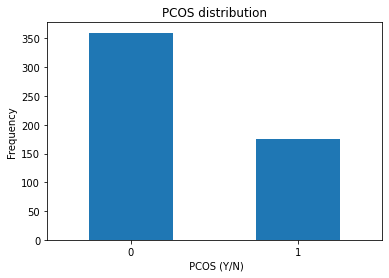

In [2807]:
import matplotlib.pyplot as plt

count_classes = pd.value_counts(y, sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("PCOS distribution")

plt.xticks(range(2))

plt.xlabel(" PCOS (Y/N)")

plt.ylabel("Frequency")

imbalence in the dataset

In [2808]:
X=final_df.iloc[:,1:]
X.isnull().sum()


 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     0
Pregnant(Y/N)             0
No. of abortions          0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)           0
Reg.Exercise(Y/N)         0
BP _Systolic (mmHg)       0
BP _Diastolic (mmHg)

In [2809]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 20)

In [2810]:
X_train.dtypes,y_train.dtypes

( Age (yrs)                  int64
 Weight (Kg)               float64
 Height(Cm)                float64
 BMI                       float64
 Blood Group                 int64
 Pulse rate(bpm)             int64
 RR (breaths/min)            int64
 Hb(g/dl)                  float64
 Cycle(R/I)                  int64
 Cycle length(days)          int64
 Marraige Status (Yrs)     float64
 Pregnant(Y/N)               int64
 No. of abortions            int64
   I   beta-HCG(mIU/mL)    float64
 II    beta-HCG(mIU/mL)    float64
 FSH(mIU/mL)               float64
 LH(mIU/mL)                float64
 FSH/LH                    float64
 Hip(inch)                   int64
 Waist(inch)                 int64
 Waist:Hip Ratio           float64
 TSH (mIU/L)               float64
 AMH(ng/mL)                float64
 PRL(ng/mL)                float64
 Vit D3 (ng/mL)            float64
 PRG(ng/mL)                float64
 RBS(mg/dl)                float64
 Weight gain(Y/N)            int64
 hair growth(Y/N)   

In [2811]:
#as target variable is imbalenced so creatic the synthetic data with the help of oversampling the minority data so that it will contribute equally
#in the model
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  
# import SMOTE module from imblearn library

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 143
Before OverSampling, counts of label '0': 285 

After OverSampling, the shape of train_X: (570, 51)
After OverSampling, the shape of train_y: (570,) 

After OverSampling, counts of label '1': 285
After OverSampling, counts of label '0': 285


In [2812]:
X_train_res

,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),...,BMI_a,BMI_b,BMI_c,hypo_s,normal_s,pre_hyper_s,hyper_s,abn1,abn2,nrml
0,33,60.000000,162.000000,22.900000,11,72,18,10.300000,2,6,...,0.0,1.000000,0.000000,0.0,0.0,1.0,0.0,1.000000,0.000000,0.000000
1,32,60.000000,145.000000,28.500000,15,73,18,11.200000,4,5,...,0.0,1.000000,0.000000,0.0,0.0,1.0,0.0,0.000000,0.000000,1.000000
2,27,52.000000,150.000000,23.100000,11,82,20,11.100000,2,5,...,0.0,0.000000,1.000000,0.0,0.0,1.0,0.0,0.000000,0.000000,1.000000
3,26,53.500000,161.544000,20.500000,14,70,18,10.600000,4,7,...,0.0,1.000000,0.000000,0.0,0.0,1.0,0.0,1.000000,0.000000,0.000000
4,28,75.000000,165.000000,27.500000,15,72,18,12.000000,2,5,...,0.0,0.000000,1.000000,0.0,0.0,1.0,0.0,1.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,28,69.276918,161.360547,26.674865,11,72,18,11.361541,2,4,...,0.0,0.574361,0.425639,0.0,0.0,1.0,0.0,0.425639,0.000000,0.574361
566,28,74.178016,158.857588,29.428171,11,72,19,10.239163,3,3,...,0.0,0.964397,0.035603,0.0,0.0,1.0,0.0,0.000000,0.000000,1.000000
567,29,62.451941,153.461491,26.605792,15,73,18,11.372120,2,5,...,0.0,0.000000,1.000000,0.0,0.0,1.0,0.0,0.182686,0.000000,0.817314
568,23,70.980153,166.784732,25.533130,13,72,17,10.650992,4,7,...,0.0,1.000000,0.000000,0.0,0.0,1.0,0.0,0.000000,0.000000,1.000000


In [2813]:
# Fitting Random Forest Regression to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=300,  criterion='gini', max_depth=10, min_samples_split=2, min_samples_leaf=1, 
                                  min_weight_fraction_leaf=0.0, max_features='log2', max_leaf_nodes=None, min_impurity_decrease=0.0
                                  , bootstrap=True,oob_score=False, n_jobs=1, random_state=None,
                                  verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
#classifier
classifier.fit(X_train_res, y_train_res)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [2820]:
##implement the XGBoost classifier

# import XGBClassifier
# from xgboost import XGBClassifier


# # declare parameters
# params = {
            
#             'max_depth': 5,
#             'alpha': 10,
#             'learning_rate': 0.2,
#             'n_estimators':300
#         }
            
            
            
# # instantiate the classifier 
# xgb_clf = XGBClassifier(**params)



# # fit the classifier to the training data
# xgb_clf.fit(X_train_res, y_train_res)

# y_pred=xgb_clf.predict(X_test)



In [2821]:
#calculating the evaluation matrix
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,roc_auc_score,roc_curve
print(confusion_matrix(y_test, y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test, y_pred))


roc_auc=roc_auc_score(y_test,y_pred)
print("ROC_Score:",roc_auc)

#random forest     

[[71  4]
 [ 4 28]]
Accuracy Score 0.9252336448598131
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        75
           1       0.88      0.88      0.88        32

    accuracy                           0.93       107
   macro avg       0.91      0.91      0.91       107
weighted avg       0.93      0.93      0.93       107

ROC_Score: 0.9108333333333333


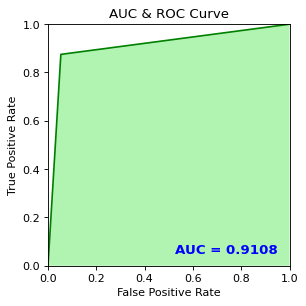

In [2819]:
#plotting the ROC(Recieving operative characteristics) and AUC(area under the curve)
roc_auc = roc_auc_score(y_test, y_pred)

false_positive_rate, true_positive_rate, thresolds =roc_curve(y_test, y_pred)

plt.figure(figsize=(5, 4), dpi=80)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % roc_auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()